In [8]:
import pandas as pd
import matplotlib.pyplot as plt

## AV percentage

In [9]:
df = pd.read_csv('trial_data/av_perc.csv', index_col=False)
df

,av_p,delay_mn,delay_sd
0,0.0,1.7740,0.93610
1,0.1,1.4420,0.67920
2,0.2,1.2570,0.82490
3,0.3,0.9437,0.33910
4,0.4,0.8340,0.26660
5,0.5,0.9206,0.60420
6,0.6,0.7193,0.21870
7,0.7,0.7775,0.29920
8,0.8,0.6178,0.20390
9,0.9,0.5385,0.09675


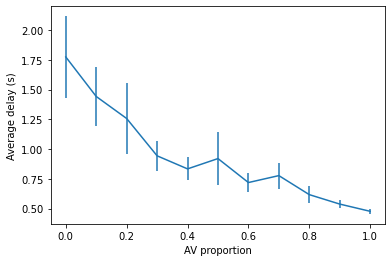

In [10]:
plt.errorbar(df['av_p'], df['delay_mn'], 2*df['delay_sd']/30**.5)
plt.xlabel('AV proportion')
plt.ylabel('Average delay (s)')
plt.savefig('figs/av_prop.png')
plt.show()

## Misreporting benefit

In [11]:
df = pd.read_csv('trial_data/one_liar.csv', index_col=False)
df.dropna(inplace=True)
df['ratio_95'] = 2*df['cost_ratio_sd']/100**.5
df.head()

,factor,config,mechanism,cost_ratio_mean,cost_ratio_sd,ratio_95
3,0.80,multiple,1st,1.641,2.052,0.4104
4,0.80,multiple,2nd,1.878,2.500,0.5000
5,0.80,multiple,ext,6.192,14.882,2.9764
12,0.85,multiple,1st,1.651,2.080,0.4160
13,0.85,multiple,2nd,1.885,2.542,0.5084


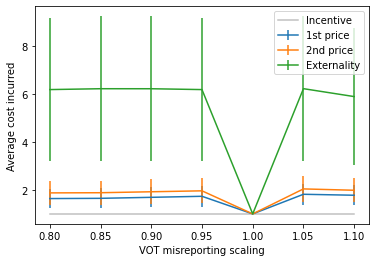

In [12]:
for mechanism in ('1st', '2nd', 'ext'):
    names = {'1st': '1st price',
    '2nd': '2nd price',
    'ext': 'Externality'}
    df_subset = df[df['mechanism'] == mechanism]
    plt.errorbar(df_subset['factor'], df_subset['cost_ratio_mean'], df_subset['ratio_95'], label=names[mechanism])
plt.plot([i/100 for i in range(80, 111, 5)], [1 for _ in range(7)], c='gray', alpha = .5, label='Incentive')
plt.xlabel('VOT misreporting scaling')
plt.ylabel('Average cost incurred')
plt.legend()
plt.savefig('figs/vot_misreport.png')
plt.show()

## Delay compared to flow

In [13]:
df = pd.read_csv('trial_data/flow.csv', index_col=False)
df.head()

,vpm,method,mean,sd
0,0.0,det,0.0000,0.00000
1,0.0,signal,0.0000,0.00000
2,0.0,soft,0.0000,0.00000
3,0.0,hard,0.0000,0.00000
4,2.5,det,0.2865,0.04244


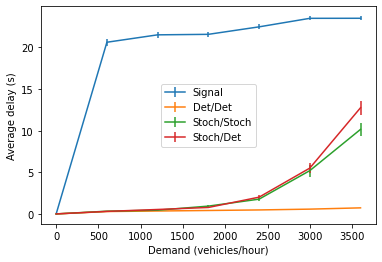

In [14]:
for method in ('signal', 'det', 'soft', 'hard'):
    names = {'signal': 'Signal',
    'det': 'Det/Det',
    'soft': 'Stoch/Stoch',
    'hard': 'Stoch/Det'}
    df_subset = df[df['method'] == method]
    plt.errorbar(df_subset['vpm']*60*4, df_subset['mean'], 2*df_subset['sd']/100**.5, label=names[method])
plt.xlabel('Demand (vehicles/hour)')
plt.ylabel('Average delay (s)')
plt.legend()
plt.savefig('figs/demand.png')
plt.show()